In [3]:
%run clean_data.py

In [4]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the data
imdb_all_years_df = pd.read_csv("./Resources/cleaned_data.csv")
imdb_all_years_df.info()
imdb_all_years_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  33600 non-null  object 
 1   Movie Link             33600 non-null  object 
 2   Year                   33600 non-null  int64  
 3   Duration               33379 non-null  object 
 4   MPA                    25624 non-null  object 
 5   Rating                 33462 non-null  float64
 6   Votes                  33462 non-null  object 
 7   budget                 11815 non-null  float64
 8   grossWorldWide         18222 non-null  float64
 9   gross_US_Canada        17571 non-null  float64
 10  opening_weekend_Gross  15523 non-null  float64
 11  directors              33600 non-null  object 
 12  writers                33600 non-null  object 
 13  stars                  33600 non-null  object 
 14  genres                 33600 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,Swiss Family Robinson,Swiss Family Robinson,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,Psycho,Psycho,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,The Apartment,The Apartment,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,Spartacus,Spartacus,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,Breathless,Breathless,1960,1h 30m,Not Rated,7.7,90K,400000.0,594039.0,414173.0,...,"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...","['Caper', 'Crime', 'Drama']",['France'],"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,1960.0


In [6]:
# Ensure 'grossWorldWide' is numeric (handle missing values and potential strings)
imdb_all_years_df["grossWorldWide"] = pd.to_numeric(imdb_all_years_df["grossWorldWide"], errors="coerce")

# Group by 'Year' and sum the 'grossWorldWide' revenue
global_box_office_by_year = imdb_all_years_df.groupby("Year")["grossWorldWide"].sum().reset_index()

# Display the first few rows
print(global_box_office_by_year.head())

   Year  grossWorldWide
0  1960      99911286.0
1  1961     292788928.0
2  1962      68904961.0
3  1963     161182065.0
4  1964     278122746.0


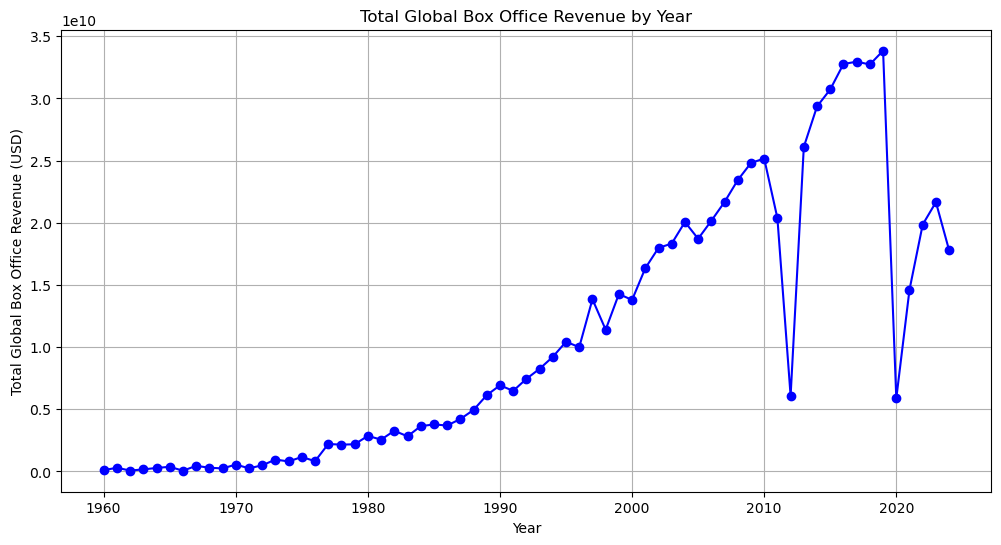

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(global_box_office_by_year["Year"], global_box_office_by_year["grossWorldWide"], marker="o", linestyle="-", color="b")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Global Box Office Revenue (USD)")
plt.title("Total Global Box Office Revenue by Year")
plt.grid(True)

# Show the plot
plt.show()

In [18]:
# Ensure 'grossWorldWide' is numeric
imdb_all_years_df["grossWorldWide"] = pd.to_numeric(imdb_all_years_df["grossWorldWide"], errors="coerce")

# Drop any movies where 'grossWorldWide' is missing
imdb_all_years_df = imdb_all_years_df.dropna(subset=["grossWorldWide"])

# Explode genres so that each movie-genre pair gets its own row
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str)  # Ensure it's a string
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].str.split(", ")  # Split into list
#imdb_exploded = imdb_all_years_df.explode("genres")  # Creates a new row for each genre

# Ensure 'genres' is a string and split it into lists
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str).replace('[',"").replace(']',"").str.split(",")
# Strip whitespace from each genre before exploding
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].apply(lambda x: [g.strip() for g in x])

# Now explode
imdb_exploded = imdb_all_years_df.explode("genres")


In [21]:
# Group by Year and Genre, summing worldwide gross
genre_box_office = (
    imdb_exploded.groupby(["Year", "genres"])["grossWorldWide"].sum().reset_index()
)

# Get total box office per year
total_box_office_by_year = (
    imdb_all_years_df.groupby("Year")["grossWorldWide"].sum().reset_index()
)

# Merge to compute percentages
genre_box_office = genre_box_office.merge(
    total_box_office_by_year, on="Year", suffixes=("_genre", "_total")
)

# Compute percentage of total revenue for each genre
genre_box_office["percent_of_total"] = (
    genre_box_office["grossWorldWide_genre"] / genre_box_office["grossWorldWide_total"]
) * 100

# Preview results
print(genre_box_office.head())


   Year                     genres  grossWorldWide_genre  \
0  1960     '\'"\\\'Action\\\'"\''                 416.0   
1  1960  '\'"\\\'Adventure\\\'"\''            42216914.0   
2  1960  '\'"\\\'Biography\\\'"\''             1846975.0   
3  1960     '\'"\\\'Comedy\\\'"\''            18778738.0   
4  1960      '\'"\\\'Crime\\\'"\''              644047.0   

   grossWorldWide_total  percent_of_total  
0            99911286.0          0.000416  
1            99911286.0         42.254400  
2            99911286.0          1.848615  
3            99911286.0         18.795412  
4            99911286.0          0.644619  


<Figure size 1200x600 with 0 Axes>

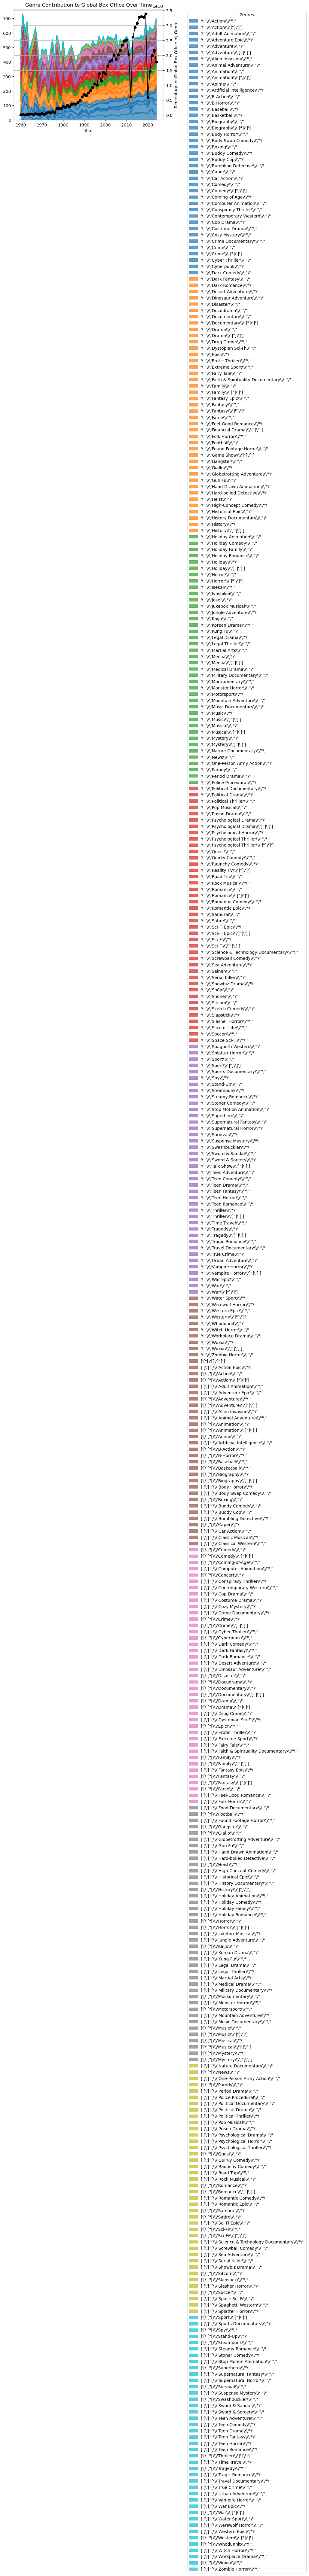

In [22]:
# Pivot the data for stacked area chart
pivot_genre = genre_box_office.pivot(index="Year", columns="genres", values="percent_of_total").fillna(0)

# Plot the stacked area chart
plt.figure(figsize=(12, 6))
pivot_genre.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7)

# Move the legend further to the right
plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1), title="Genres")

# Twin plot for total box office revenue
plt.twinx()
plt.plot(total_box_office_by_year["Year"], total_box_office_by_year["grossWorldWide"], 
         marker="o", linestyle="-", color="black", label="Total Global Box Office")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Global Box Office by Genre")
plt.title("Genre Contribution to Global Box Office Over Time")
plt.grid(True)

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

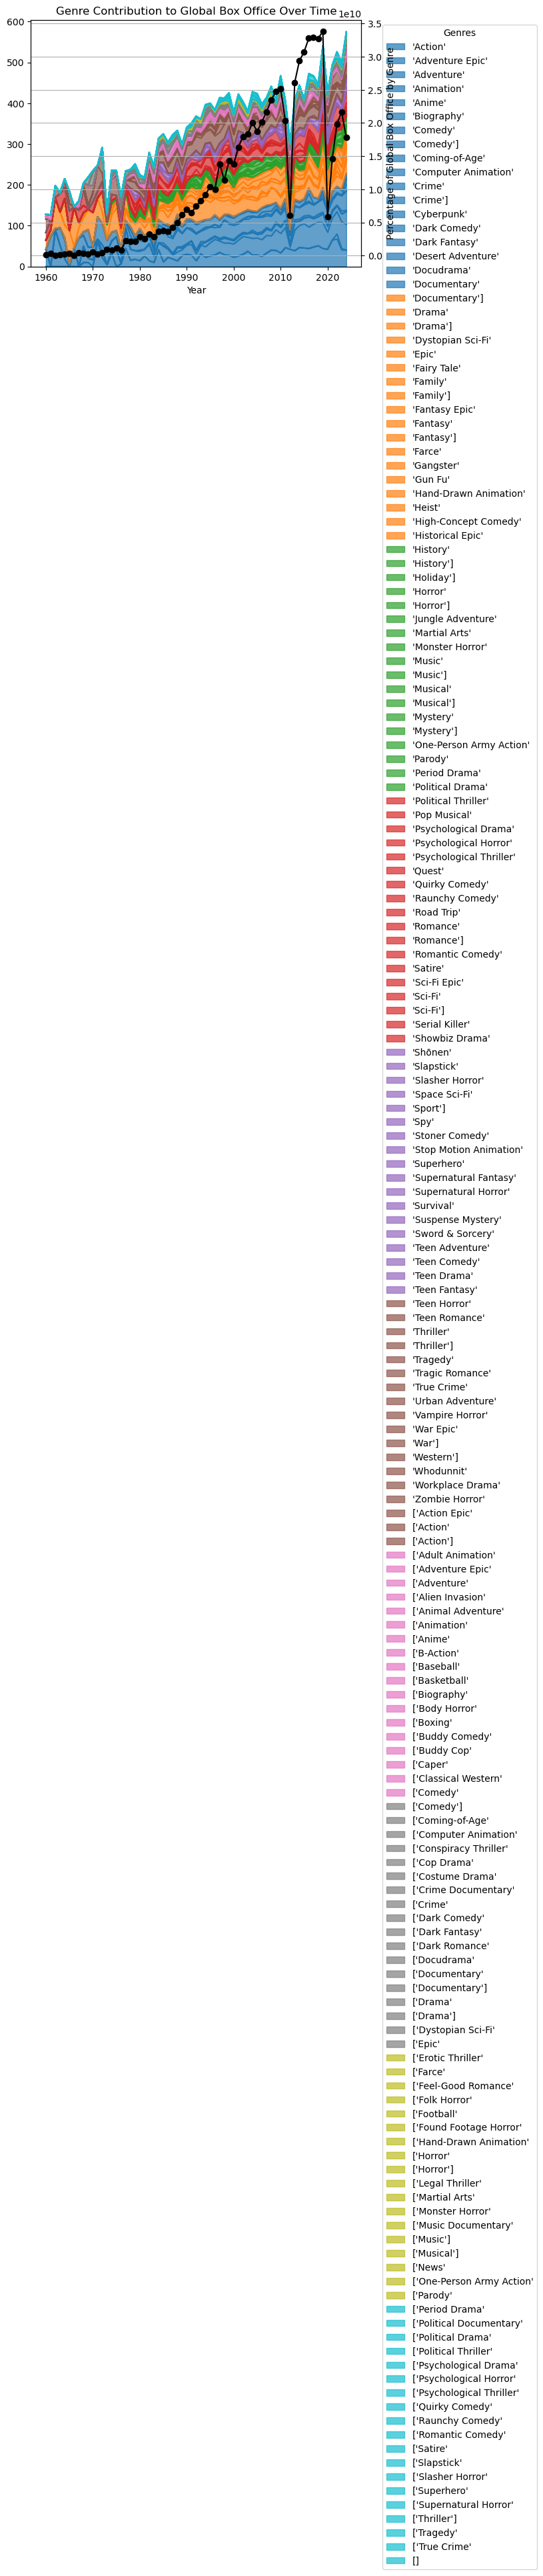

In [12]:
# Count the number of movies per genre per year
genre_counts = imdb_exploded.groupby(["Year", "genres"]).size().reset_index(name="movie_count")

# Merge the counts with our genre revenue data
genre_box_office = genre_box_office.merge(genre_counts, on=["Year", "genres"])

# Filter out genres that appear in fewer than X movies in a given year
genre_box_office = genre_box_office[genre_box_office["movie_count"] >= 4]

# Pivot the data for stacked area chart
pivot_genre = genre_box_office.pivot(index="Year", columns="genres", values="percent_of_total").fillna(0)

# Plot the stacked area chart
plt.figure(figsize=(12, 6))
pivot_genre.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7)

# Move the legend further to the right
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Genres")

# Twin plot for total box office revenue
plt.twinx()
plt.plot(total_box_office_by_year["Year"], total_box_office_by_year["grossWorldWide"], 
         marker="o", linestyle="-", color="black", label="Total Global Box Office")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Global Box Office by Genre")
plt.title("Genre Contribution to Global Box Office Over Time")
plt.grid(True)

# Show the plot
plt.show()


